In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv("Documents/Lambton Sem 3/Capstone Project/Python Project/Book_data.csv")

In [8]:
data.head()

,Id,Name,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating
0,1,Harry Potter and the Half-Blood Prince (Harry ...,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57
1,2,Harry Potter and the Order of the Phoenix (Har...,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.50
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47
3,4,Harry Potter and the Chamber of Secrets (Harry...,Scholastic,244,2003,eng,J.K. Rowling,4.42
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57


In [9]:
data.describe()

,Id,CountsOfReview,PublishYear,Rating
count,58292.000000,58292.000000,58292.000000,58292.000000
mean,49630.214712,147.798583,1999.543831,3.660090
std,29222.822866,1247.890971,11.858423,1.010905
min,1.000000,0.000000,162.000000,0.000000
25%,24615.750000,0.000000,1997.000000,3.630000
50%,48797.500000,4.000000,2002.000000,3.900000
75%,76017.250000,32.000000,2005.000000,4.120000
max,99999.000000,94850.000000,3002.000000,5.000000


In [10]:
#Calculating Pearson Corealtion Coefficient
ratings = pd.DataFrame(data.groupby('Name')['Rating'].mean())
ratings.head()

,Rating
Name,
"""""We Only Come Here to Struggle"""": Stories from Berida's Life",3.43
"""A"" Is For Asia",4.02
"""A"" Is for Abductive : The Language of the Emerging Church",3.14
"""A"" Is for Zebra",3.78
"""Age Doesn't Matter Unless You're a Cheese"": Wisdom from Our Elders",3.70


In [12]:
ratings['CountsOfReview'] = data.groupby('Name')['Rating'].count()
ratings.head()

,Rating,number_of_ratings,CountsOfReview
Name,,,
"""""We Only Come Here to Struggle"""": Stories from Berida's Life",3.43,1,1
"""A"" Is For Asia",4.02,1,1
"""A"" Is for Abductive : The Language of the Emerging Church",3.14,1,1
"""A"" Is for Zebra",3.78,1,1
"""Age Doesn't Matter Unless You're a Cheese"": Wisdom from Our Elders",3.70,1,1


In [15]:
ratings = ratings.drop(columns=['number_of_ratings','CountsOfReview'])


In [16]:
ratings.head()

,Rating
Name,
"""""We Only Come Here to Struggle"""": Stories from Berida's Life",3.43
"""A"" Is For Asia",4.02
"""A"" Is for Abductive : The Language of the Emerging Church",3.14
"""A"" Is for Zebra",3.78
"""Age Doesn't Matter Unless You're a Cheese"": Wisdom from Our Elders",3.70


In [22]:
#multiplied ratings with the number of ratings a book got
data['new_ratings']= data['Rating']*data['CountsOfReview']

In [23]:
data.head()

,Id,Name,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,new_ratings
0,1,Harry Potter and the Half-Blood Prince (Harry ...,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,128243.34
1,2,Harry Potter and the Order of the Phoenix (Har...,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.50,133965.00
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,339322.17
3,4,Harry Potter and the Chamber of Secrets (Harry...,Scholastic,244,2003,eng,J.K. Rowling,4.42,1078.48
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57,169515.01


In [25]:
Newratings = pd.DataFrame(data.groupby('Name')['new_ratings'].mean())
Newratings.head()

,new_ratings
Name,
"""""We Only Come Here to Struggle"""": Stories from Berida's Life",0.00
"""A"" Is For Asia",8.04
"""A"" Is for Abductive : The Language of the Emerging Church",9.42
"""A"" Is for Zebra",79.38
"""Age Doesn't Matter Unless You're a Cheese"": Wisdom from Our Elders",40.70


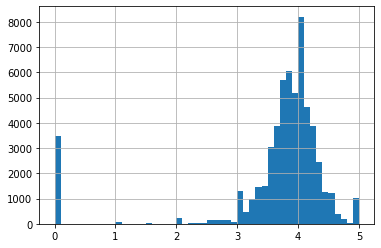

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['Rating'].hist(bins=50)

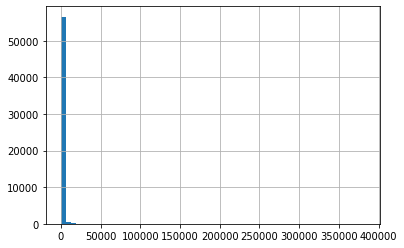

In [27]:
Newratings['new_ratings'].hist(bins=60)

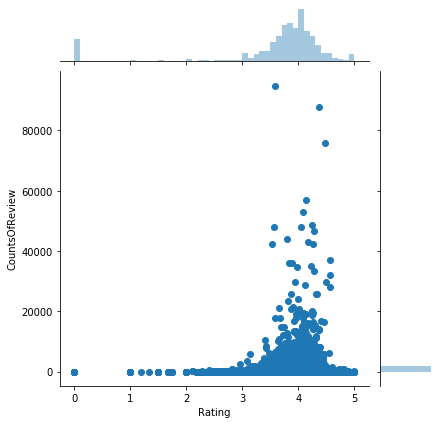

In [32]:
import seaborn as sns
sns.jointplot(x='Rating', y='CountsOfReview', data=data)

In [34]:
book_matrix = data.pivot_table(index='Id', columns='Name', values='Rating')
book_matrix.head()

ValueError: Unstacked DataFrame is too big, causing int32 overflow